# Predicting attractive cities for tourism

## Introduction/Business Problem

Tourism is an important economic income for cities. Some cities are attractive because of their beaches, their building, their history and much more. But there are also some cities which wouldn't be nice to go for a vacation. In this project I will analyze the **possibility of predicting how attractive a given city could be and try to build a machine learning model that can do it**. This could help people know which city to visit for their next vacation and governments know how to make their cities more attractive.

## Data

The data used for this project will be obtained from Foursquare using the [Foursquare API](https://developer.foursquare.com/docs/places-api/). As many categories of data are too specific and many of them are unique in their country, I used the most general categories in the [Foursquare Venue Category Tree](https://developer.foursquare.com/docs/build-with-foursquare/categories/).

In addition, the cities categorized as "good tourist cities" will be chosen based on articles on the internet like [this one](https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors). Venues data obtained from these cities will be fed into the machine learning algorithm to create the model.

## Methodology

There are many types of tourist destinations, as shown in [this article](https://tourismteacher.com/types-of-tourist-destinations/), and some of them could be treated as a single venue by the Foursquare API which would not be good for our model. That's the reason this project is aimed at predicting good **towns and cities**, considering these tend to have a variety of venues we can work with.

So now, the first step will be choosing the cities I will be getting the data from. Let's start!

### Choosing good tourist cities

A good start for choosing our cities is looking for the most popular destinations in the world. According to [this Wikipedia article](https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors) (on 12/14/2020), the 10 most visited cities are:

- Hong Kong, China
- Bangkok, Thailand
- London, United Kingdom
- Macau, China
- Singapore, Singapore
- Paris, France
- Dubai, United Arab Emirates
- New York City, United States
- Kuala Lumpur, Malaysia
- Istanbul, Turkey

It would be useful to visualize these cities in a world map. But first, we need the coordinates of each one. For this purpose I will parse data from Wikipedia using BeatifulSoup.

In [1]:
import requests
import pandas as pd
import folium
import re
import json

In [2]:
def to_url_format(phrase):
    phrase = phrase.strip()
    phrase_words = phrase.split(" ")

    for word in phrase_words:
        word = word.capitalize()
    return "_".join(phrase_words)

def find_city_coords(city, country):
    city_formatted = to_url_format(city)
    
    base_url = "https://nominatim.openstreetmap.org/search?format=json&"
    city_query = f"city={city}"
    country_query = f"country={country}"
    
    url = base_url + city_query + "&" + country_query
    
    request = requests.get(url)
    
    if request.status_code == 200:
        response_json = json.loads(request.text)
        try:
            response_json = response_json[0]
        except:
            return (None, None)
        
        latitude = response_json["lat"]
        longitude = response_json["lon"]
        
        return (float(latitude), float(longitude))
    
    return (None, None)

In [3]:
# This list will later become a Dataframe containing data of the cities.
cities = [
    ["Hong Kong", "China"],
    ["Bangkok", "Thailand"],
    ["London", "United Kingdom"],
    ["Macau", "China"],
    ["Singapore", "Singapore"],
    ["Paris", "France"],
    ["Dubai", "United Arab Emirates"],
    ["New York City", "United States"],
    ["Kuala Lumpur", "Malaysia"],
    ["Istanbul", "Turkey"]
]

In [4]:
for row in cities:
    row.append(find_city_coords(row[0], row[1])[0]) # Append latitude.
    row.append(find_city_coords(row[0], row[1])[1]) # Append longitude.

In [5]:
cities = pd.DataFrame(cities, columns=['City', 'Country', 'Latitude', 'Longitude'])
cities.head()

,City,Country,Latitude,Longitude
0,Hong Kong,China,22.279328,114.162813
1,Bangkok,Thailand,13.754424,100.493040
2,London,United Kingdom,51.507322,-0.127647
3,Macau,China,22.189945,113.538045
4,Singapore,Singapore,1.290475,103.852036


In [6]:
world_map = folium.Map(location=[0, 0], zoom_start=1.5)

for row in cities.iterrows():
    row = row[1]
    marker = folium.Marker([row.Latitude, row.Longitude], popup=row.City, icon=folium.Icon(color='blue'))
    marker.add_to(world_map)

world_map

As we can see, most of the cities in our list are in Asia and Europe. But there are also nice tourist cities in North and South America, Africa, Russia and Australia. Let's fix that adding some more cities to our list:

- **[Latin America](https://destinationlesstravel.com/best-latin-american-cities/)**
    - Havana, Cuba
    - Medellin, Colombia
    - Rio de Janeiro, Brazil
- **[North America](https://bigseventravel.com/2019/08/the-10-most-visited-cities-in-north-america/)**
    - Miami, USA
    - Los Angeles, USA
    - Toronto, Canada
    - Vancouver, Canada
- **[Africa](https://www.africatouroperators.org/africa/25-most-beautiful-cities-and-towns-in-africa)**
    - Cape Town, South Africa
    - Zanzibar City, Tanzania
    - Lamu, Kenya
    - Essaouira, Morocco
- **[Russia](https://www.touropia.com/best-cities-to-visit-in-russia/)**
    - Moscow, Russia
    - St Petersburg, Russia
    - Kazan, Russia
    - Yekaterinburg, Russia
- **[Australia](https://www.thrillist.com/travel/nation/australias-10-best-cities-ranked-by-an-impartial-american)**
    - Perth, Australia
    - Margaret River, Australia
    - Melbourne, Australia
    - Port Douglas, Australia

Perfect, let's add these cities to our database.

In [7]:
new_cities = [
    ["Havana", "Cuba"],
    ["Medellin", "Colombia"],
    ["Rio de Janeiro", "Brazil"],
    ["Miami", "United States"],
    ["Los Angeles", "United States"],
    ["Toronto", "Canada"],
    ["Vancouver", "Canada"],
    ["Cape Town", "South Africa"],
    ["Zanzibar City", "Tanzania"],
    ["Lamu", "Kenya"],
    ["Essaouira", "Morocco"],
    ["Moscow", "Russia"],
    ["St Petersburg", "Russia"],
    ["Kazan", "Russia"],
    ["Yekaterinburg", "Russia"],
    ["Perth", "Australia"],
    ["Margaret River", "Australia"],
    ["Melbourne", "Australia"],
    ["Port Douglas", "Australia"]
]

In [8]:
for row in new_cities:
    row.append(find_city_coords(row[0], row[1])[0]) # Append latitude.
    row.append(find_city_coords(row[0], row[1])[1]) # Append longitude.

In [9]:
cities = cities.append(pd.DataFrame(new_cities, columns=cities.columns), ignore_index=True)

In [10]:
world_map = folium.Map(location=[0, 0], zoom_start=1.5)

for row in cities.iterrows():
    row = row[1]
    marker = folium.Marker([row.Latitude, row.Longitude], popup=row.City, icon=folium.Icon(color='blue'))
    marker.add_to(world_map)

world_map

Now our map is filled with nice tourist cities. I will export the data obtained to a .csv file so you can use it without running the code.

In [11]:
cities.to_csv("../data/capstone/city_coords.csv", index=False)

### Choosing bad tourist cities

Of course, our algorithm not only needs good tourist cities, but it also needs *bad* ones. Let's choose some from the following articles:

- https://journalistontherun.com/2016/01/04/15-worst-travel-destinations/
- https://www.mapquest.com/travel/the-worst-cities-to-visit-in-the-united-states/
- https://www.smartertravel.com/9-boring-cities-world/
- https://leaveyourdailyhell.com/2019/10/14/most-boring-cities-in-the-world/

- Cunnamulla, Australia
- Malabo, Equatorial Guinea
- Naples, Italy
- Potosí, Bolivia
- Flores, Indonesia
- Bratislava, Slovakia
- Mandalay, Myanmar
- Saigon, Vietnam
- Pyongyang, North Korea
- St Louis, United States
- Detroit, United States
- Oakland, United States
- Atlatna, United States
- Nagoya, Japan
- Casablanca, Morocco
- Ottawa, Canada
- Frankfurt, Germany
- Nassau, Bahamas
- Zurich, Switzerland
- Canberra, Australia
- Guayaquil, Ecuador
- Agra, India
- Brisbane, Australia
- Bucharest, Romania
- Haifa, Israel
- Mexico City, Mexico
- Oslo, Norway
- Vientiane, Laos

Now, let's do the same process again to obtain the coords for these cities.

In [12]:
boring_cities = [
    ["Cunnamulla", "Australia"],
    ["Malabo", "Equatorial Guinea"],
    ["Naples", "Italy"],
    ["Potosí", "Bolivia"],
    ["Flores", "Indonesia"],
    ["Bratislava", "Slovakia"],
    ["Mandalay", "Myanmar"],
    ["Saigon", "Vietnam"],
    ["Pyongyang", "North Korea"],
    ["St Louis", "United States"],
    ["Detroit", "United States"],
    ["Oakland", "United States"],
    ["Atlanta", "United States"],
    ["Nagoya", "Japan"],
    ["Casablanca", "Morocco"],
    ["Ottawa", "Canada"],
    ["Frankfurt", "Germany"],
    ["Nassau", "Bahamas"],
    ["Zurich", "Switzerland"],
    ["Canberra", "Australia"],
    ["Guayaquil", "Ecuador"],
    ["Agra", "India"],
    ["Brisbane", "Australia"],
    ["Bucharest", "Romania"],
    ["Haifa", "Israel"],
    ["Mexico City", "Mexico"],
    ["Oslo", "Norway"],
    ["Vientiane", "Laos"],
]

In [13]:
for row in boring_cities:
    row.append(find_city_coords(row[0], row[1])[0]) # Append latitude.
    row.append(find_city_coords(row[0], row[1])[1]) # Append longitude.

In [14]:
boring_cities = pd.DataFrame(boring_cities, columns=cities.columns)

In [15]:
boring_map = folium.Map(location=[0, 0], zoom_start=1.5)

for row in boring_cities.iterrows():
    row = row[1]
    marker = folium.Marker([row.Latitude, row.Longitude], popup=row.City, icon=folium.Icon(color='red'))
    marker.add_to(boring_map)

boring_map

### Merging in a single DataFrame

Now, it would be nice to have all the data we've collected so far merged in a single DataFrame. A new column will be added, indicating if the city is nice or not for tourism.

In [16]:
cities["Tourist"] = 1
boring_cities["Tourist"] = 0

cities = cities.append(boring_cities, ignore_index=True)

In [17]:
cities.head()

,City,Country,Latitude,Longitude,Tourist
0,Hong Kong,China,22.279328,114.162813,1
1,Bangkok,Thailand,13.754424,100.493040,1
2,London,United Kingdom,51.507322,-0.127647,1
3,Macau,China,22.189945,113.538045,1
4,Singapore,Singapore,1.290475,103.852036,1


In [18]:
cities.tail()

,City,Country,Latitude,Longitude,Tourist
52,Bucharest,Romania,44.436141,26.102720,0
53,Haifa,Israel,32.819122,34.998386,0
54,Mexico City,Mexico,19.432630,-99.133178,0
55,Oslo,Norway,59.913330,10.738970,0
56,Vientiane,Laos,17.964099,102.613371,0


### Obtaining venue data

The next step is obtaining venue data using the Foursquare API. I will be using the `dotenv` package to save my API credentials safely. If you want to run this notebook you will have to provide your API credentials saving them in the `.env` file in the root directory.

In [19]:
# !pip install python-dotenv
from dotenv import load_dotenv
import os
load_dotenv(dotenv_path="../.env")

True

In [20]:
FOURSQUARE_VERSION = "20201612"
FOURSQUARE_ID = os.getenv("FOURSQUARE_ID")
FOURSQUARE_SECRET = os.getenv("FOURSQUARE_SECRET")

In [21]:
def get_category_tree(cat_list):
    categories = {}
    
    for cat in cat_list:
        if cat["categories"] != []:
            subcat = get_category_tree(cat["categories"])
            categories[cat["name"]] = subcat
        else:
            categories[cat["name"]] = {}# cat["name"]
    
    return categories

request = requests.get(url="https://api.foursquare.com/v2/venues/categories", params={
    "client_id": FOURSQUARE_ID,
    "client_secret": FOURSQUARE_SECRET,
    "v": FOURSQUARE_VERSION
})

category_tree = get_category_tree(json.loads(request.text)["response"]["categories"])

In [22]:
def get_up_branch(category, cat_tree, name="root"):
    for key in cat_tree.keys():
        if key == category:
            return name
        else:
            main_branch = get_up_branch(category, cat_tree[key], key)
            if main_branch : return main_branch
            
def get_main_branch(category, cat_tree, name="root"):
    main_keys = cat_tree.keys()
    
    if category in main_keys:
        return category
    else:
        up_branch = get_up_branch(category, cat_tree)
        main_branch = get_main_branch(up_branch, cat_tree, up_branch)
        
        if main_branch:
            return main_branch

In [23]:
def get_trending_venues(lat, lon):
    base_url = "https://api.foursquare.com/v2/venues/explore"
    params = dict(
        client_id=FOURSQUARE_ID,
        client_secret=FOURSQUARE_SECRET,
        v=FOURSQUARE_VERSION,
        ll=f'{lat},{lon}',
        limit=30
    )
    
    resp = requests.get(url=base_url, params=params)
    data = json.loads(resp.text)
    
    recommended = data["response"]["groups"][0]
    venues = []
    
    for item in recommended["items"]:
        category = item["venue"]["categories"][0]["name"]
        category = get_main_branch(category, category_tree)
        venues.append(category)
    
    return venues

def get_venue_dataframe(city_series):
    city = city_series["City"]
    latitude = city_series["Latitude"]
    longitude = city_series["Longitude"]
    
    venues = pd.Series(get_trending_venues(latitude,longitude)).value_counts(normalize=True)
    venues['City'] = city
    return pd.DataFrame(venues).T

In [24]:
venues = pd.DataFrame()

for row in cities.iterrows():
    row = row[1]
    venue_dataframe = get_venue_dataframe(row)
    venues = venues.append(venue_dataframe)
    
venues = venues.fillna(0)

In [25]:
cities = pd.merge(cities, venues)
cities.head()

,City,Country,Latitude,Longitude,Tourist,Food,Travel & Transport,Outdoors & Recreation,Shop & Service,Professional & Other Places,Arts & Entertainment,Nightlife Spot,Residence,College & University
0,Hong Kong,China,22.279328,114.162813,1,0.400000,0.200000,0.166667,0.100000,0.066667,0.033333,0.033333,0.0,0.0
1,Bangkok,Thailand,13.754424,100.493040,1,0.400000,0.000000,0.166667,0.033333,0.100000,0.266667,0.033333,0.0,0.0
2,London,United Kingdom,51.507322,-0.127647,1,0.433333,0.066667,0.166667,0.066667,0.066667,0.133333,0.066667,0.0,0.0
3,Macau,China,22.189945,113.538045,1,0.666667,0.000000,0.066667,0.000000,0.133333,0.066667,0.066667,0.0,0.0
4,Singapore,Singapore,1.290475,103.852036,1,0.300000,0.066667,0.100000,0.066667,0.066667,0.300000,0.100000,0.0,0.0


In [26]:
cities.shape

(57, 14)

### Exploring the data

Now that we have the required data, I will visualize it using `seaborn` to try and find any good predictors of a good tourist city.

In [27]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Tourist', ylabel='Food'>

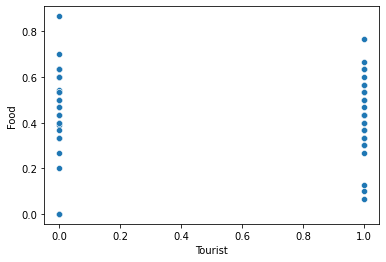

In [28]:
sns.scatterplot(x="Tourist", y="Food", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Travel & Transport'>

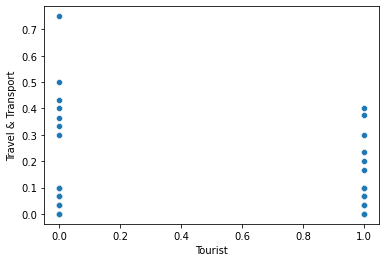

In [29]:
sns.scatterplot(x="Tourist", y="Travel & Transport", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Outdoors & Recreation'>

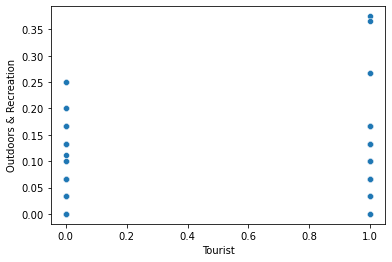

In [30]:
sns.scatterplot(x="Tourist", y="Outdoors & Recreation", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Shop & Service'>

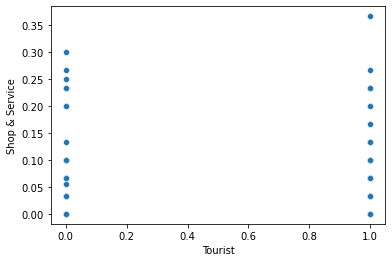

In [31]:
sns.scatterplot(x="Tourist", y="Shop & Service", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Professional & Other Places'>

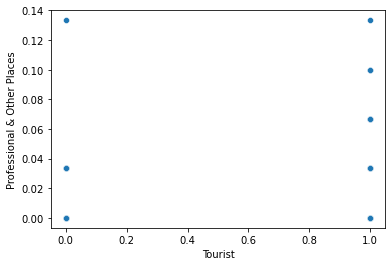

In [32]:
sns.scatterplot(x="Tourist", y="Professional & Other Places", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Nightlife Spot'>

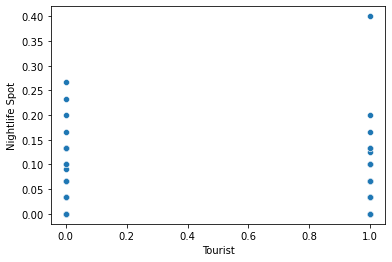

In [33]:
sns.scatterplot(x="Tourist", y="Nightlife Spot", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Arts & Entertainment'>

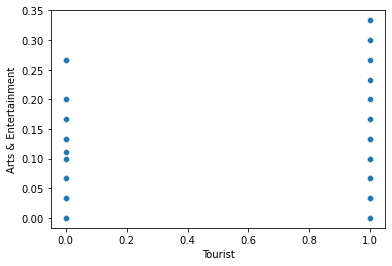

In [34]:
sns.scatterplot(x="Tourist", y="Arts & Entertainment", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='Residence'>

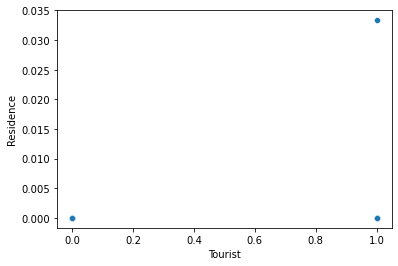

In [35]:
sns.scatterplot(x="Tourist", y="Residence", data=cities)

<AxesSubplot:xlabel='Tourist', ylabel='College & University'>

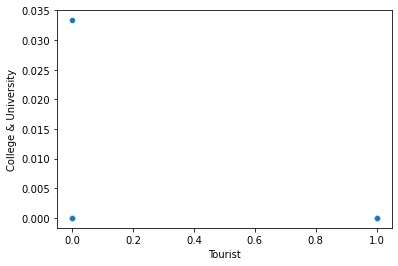

In [36]:
sns.scatterplot(x="Tourist", y="College & University", data=cities)

As you can see, the data between attractive and not-attractive cities is pretty similar. This means that venues are not a good predictor for our objective. Next, I will train a machine learning model with the data, keeping in mind it may not result in accurate predictions.

## Machine Learning Implementation

It's important to remember the objective of this project is finding out whether a city would be attractive for tourism or not. In other words, we are going to **classify** cities. There are a lot of classification algorithms, such as Support Vector Machines, Logistic Regression, Naive Bayes, and others.

As our dataset is limited to only 57 cities, I will choose an algorithm that doesn't require much data to work, such as a Support Vector Machine. Also, I will use GridSearchCV to find the best hyperparameters for the model.

### SVM Classification

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [113]:
x = cities.drop(columns=["City", "Country", "Latitude", "Longitude", "Tourist"])
y = cities["Tourist"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=22)

In [114]:
hyperparams = {
    'gamma': ['scale', 'auto']
}

svm = GridSearchCV(estimator=SVC(C=0.3, random_state=102), param_grid=hyperparams, cv=10)
svm.fit(x_train, y_train)
svm.best_params_

{'gamma': 'scale'}

In [115]:
# In-sample f1 score
f1_score(y_train, svm.predict(x_train))

0.6896551724137931

In [116]:
# Out-of-sample f1 score
svm_predicted = svm.predict(x_test)
f1_score(y_test, svm_predicted)

0.6428571428571429

## Results

As result of this project we obtained a SVM model that predicts whether a given city is attractive for tourism or not based on its venues. The model has an in-sample f1 score of 0.689, and an out-of-sample f1 score of 0.64. However, the model is unstable and has some issues that are going to be discussed in the following section.

## Discussion

The model that was obtained as a result has an f1 score of 0.64, which I wouldn't say is very good. In addition to that, it is too dependent on the random state of the functions used. If you change the random state of the train-test-split or the SVM instance, the scores will change dramatically, even getting to 0 some times. There are some possible reasons as to why this happens.

### Issues

The first main issue is the **chosen cities** to train our algorithm. There is no objective way to measure the attractiveness of a city. This is subjective. The first measure I used to choose the cities was the amount of people visiting them, which doesn't imply they are attractive but that they are relevant.

The second issue is that **venue data** is really similar across all cities. Every city has restaurants, shops, parks, etc. Because our data was based just on the amount of venues of certain categories, it cannot be a good predictor.

The third issue is the **categories** of the venues. I chose the main branches of the category tree of Foursquare because it was the fastest way to format the data.

### Possible solutions

I've come up with some solutions for the issues listed above. I wish I could've solve them in this same notebook, but time and money limitations won't allow me to do so.

1. Find a way to objectively measure the attractiveness of a city.
2. Obtain additional data that could be potential predictors, such as crime rates and venue user-ratings instead of amount.
3. Find better venue categories.

## Conclusion

The objective of this project was to find if it is possible to predict how attractive a city is for tourism based on its venues. After exploring the venue data of the dataset I concluded that venues were not a good predictor of the attractiveness of a city, statement that was later confirmed by the trained SVM model, which did not have high accuracy and was very sensitive to changes in random state.

However, the idea of the project is not bad and the results have uncovered hints on what kind of data can lead us to improvement in the future. I myself will be working on training a high accuracy model and I encourage the reader to do it too.